# Netflix Movies and TV Shows 

Netflix is a subscription-based streaming service that allows their members to watch TV shows and movies without commercials on an internet-connected device.Netflix content varies by region and may change over time. You can watch from a wide variety of award-winning Netflix Originals, TV shows, movies, documentaries, and more. 

Personaly Iam a big fan of netflix series (money heist) . So for me it's a interesting dataset to work.
Here Iam going through the dataset with some visualisation for easy analysis of data.

I got this data set from kaggle you can found the link below.

Here ,Iam using python libraries PANDAS , MATHPLOTLIB , SEABORN for datavisualisation and analysis. 



## Downloading the Dataset

you can download the dataset from [netflix movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows/notebooks)

I downloaded and manually upload this dataset to the jupyter notebook.

In [1]:
import os
os.listdir(".")

['.ipynb_checkpoints',
 '.jovianrc',
 'environment-macos.yml',
 'environment.yml',
 'netflix_titles.csv',
 'zerotopandas-course-project.ipynb']

you can see that I added the file "netflix_title.csv" 

In [2]:
project_name = "netflix-movies-and-tv-shows" 

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

Here we are going through some details about the dataset,like
* how many column and row it contain 
* what are the column represent 
* how many vacent spaces are there 




In [6]:
import pandas as pd

In [7]:
# changing netflix.csv to opandas dtatframes
netflix_main_df = pd.read_csv('netflix_titles.csv')

lets go through the dataframe once

In [8]:
# making copy of dataset 
netflix_df = netflix_main_df.copy()
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


The data contains 6234 rows and 12 columns  

In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


we can see some column have so many missing data

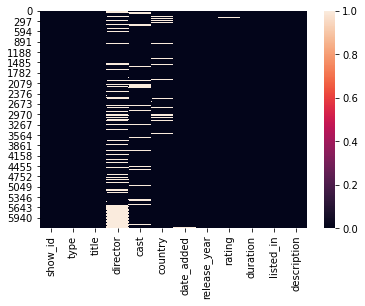

In [10]:
#plotting heat map for null values
import seaborn as sns

sns.heatmap(netflix_df.isnull());

As we can see, the columns of director, cast, country have the highest number of missing values associated with it.
I am keeping the missing value as it is. I will handle them when I go through the dataset in visualisation section.
for the rating ,country column Iam going to assign value "TV-MA" ,because its mostly used rating .

In [11]:
import numpy as np
netflix_df['rating'].replace(np.NaN,'TV-MA',inplace=True)
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


now rating column does not have any null values

In [12]:
netflix_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


The dataset contains movies and tv shows between the years 1925 and 2020. 

Lets see columns contained in the data set

In [13]:
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [14]:
#getting random 10 from the dataset
netflix_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2297,80222770,TV Show,Cricket Fever: Mumbai Indians,NaN,NaN,India,"March 1, 2019",2019,TV-MA,1 Season,"Docuseries, International TV Shows",Follow Indian Premier League champions Mumbai ...
2523,80091936,Movie,Okja,Bong Joon Ho,"Tilda Swinton, Jake Gyllenhaal, An Seo Hyun, P...","South Korea, United States","June 28, 2017",2017,TV-MA,121 min,"Action & Adventure, Comedies, Dramas",A gentle giant and the girl who raised her are...
1320,80058424,Movie,John Mulaney: The Comeback Kid,Rhys Thomas,John Mulaney,United States,"November 13, 2015",2015,TV-MA,62 min,Stand-Up Comedy,"Armed with boyish charm and a sharp wit, the f..."
3468,70253597,Movie,Monsters: Dark Continent,Tom Green,"Johnny Harris, Sam Keeley, Joe Dempsie, Kyle S...",United Kingdom,"January 10, 2020",2014,R,119 min,"Action & Adventure, Dramas, Independent Movies",An American platoon stationed in the Middle Ea...
4115,80109535,TV Show,The Cuba Libre Story,NaN,NaN,"France, Germany","December 8, 2016",2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...
574,70109884,Movie,Karzzzz,Satish Kaushik,"Himesh Reshammiya, Urmila Matondkar, Shweta Ku...",India,"October 22, 2017",2008,TV-14,137 min,"International Movies, Music & Musicals, Romant...",When flashbacks reveal that he's the reincarna...
71,80187061,Movie,The Mayor,Park In-je,"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...",South Korea,"September 30, 2017",2017,TV-MA,130 min,"Dramas, International Movies","With the presidency in mind, the incumbent may..."
787,81166946,TV Show,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,"October 1, 2019",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","In this adaptation of a popular webtoon, a poo..."
2346,70048905,Movie,Iqbal,Nagesh Kukunoor,"Shreyas Talpade, Naseeruddin Shah, Girish Karn...",India,"March 1, 2018",2006,TV-Y7,127 min,"Dramas, Independent Movies, International Movies",A boy with a hearing and speech impairment – a...
1230,70083532,Movie,The Pixar Story,Leslie Iwerks,Stacy Keach,United States,"November 18, 2018",2007,G,89 min,Documentaries,Go behind the scenes at Pixar Animation Studio...


In [15]:
import jovian

In [ ]:
jovian.commit()

## Exploratory Analysis and Visualization

In this section we are using some visualisation for better understaning.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**lets see how many title are under type Movies and TV Shows** 

In [18]:
titles_df = netflix_df.groupby("type")["title"].count()
titles = netflix_df["type"].unique()
explode = (0.07,0)

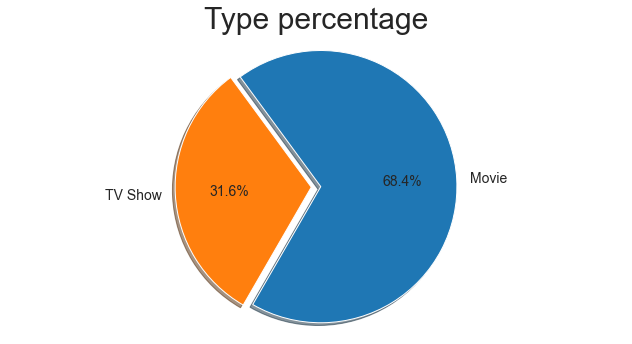

In [19]:
plt.pie(titles_df ,explode=explode, labels = titles ,autopct='%1.1f%%', shadow=True,startangle=240)
plt.title("Type percentage",fontsize=30)
plt.axis('equal')
plt.tight_layout();

we can see that most of the netflix release are movies. Don't forget that one TV show contains many seasons!! 

**Yearly Growth of netflix**

In [20]:
movies_df = netflix_df[netflix_df["type"]=="Movie"]
tvshow_df = netflix_df[netflix_df["type"]=="TV Show"]
movies = movies_df.groupby("release_year")["title"].count()
tvshow = tvshow_df.groupby("release_year")["title"].count()

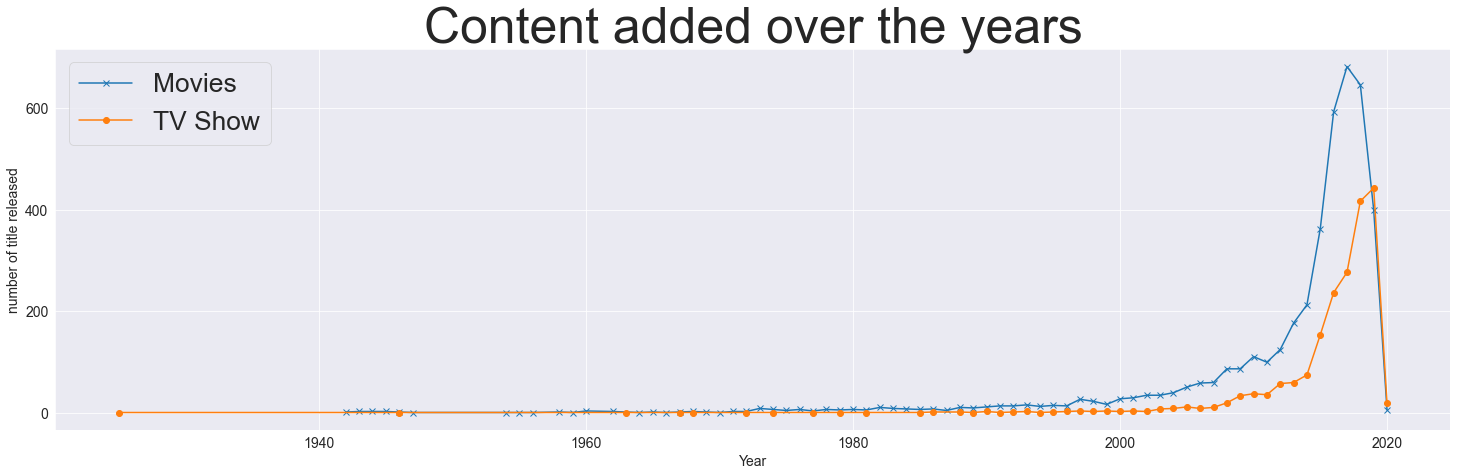

In [21]:
plt.figure(figsize=(25,7))
plt.plot(movies,marker='x')
plt.plot(tvshow,marker='o')
plt.xlabel('Year')
plt.ylabel('number of title released')
sns.set_context("paper", font_scale=3)  
plt.title("Content added over the years" ,fontsize=50)
plt.legend(['Movies', 'TV Show']);

netflix contents are increasing with year after 2010 there is a big growth. The value are less in 2020 becuase we are now in 2020!!.

**seperating titles based on rating**

In [22]:
movies_rating = movies_df.groupby("rating")["title"].count()
tvshow_rating = tvshow_df.groupby("rating")["title"].count()

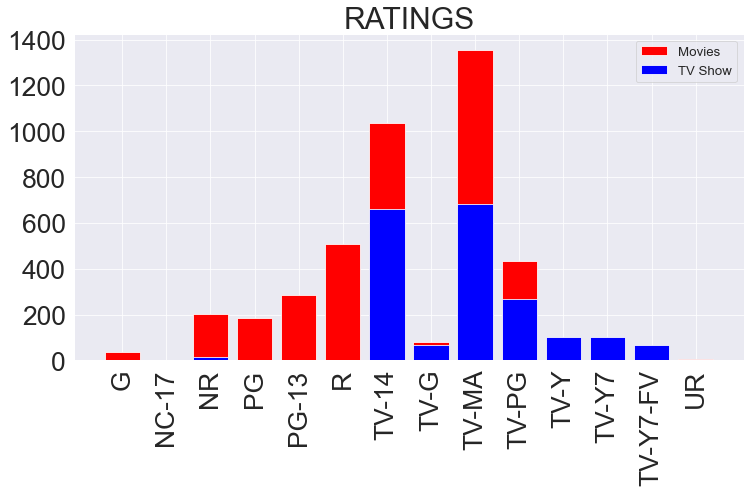

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("RATINGS",fontsize=30)
width=0.35
x=pd.array(range(len(movies)))
sns.set_context("paper", font_scale=1.5) 
plt.bar(movies_rating.index, movies_rating,color="red")
plt.bar(tvshow_rating.index, tvshow_rating,color="blue")
plt.legend(['Movies',"TV Show"]);

most of the title are rated TV_MA. in both movies and TV shows

**Duration of movies** 

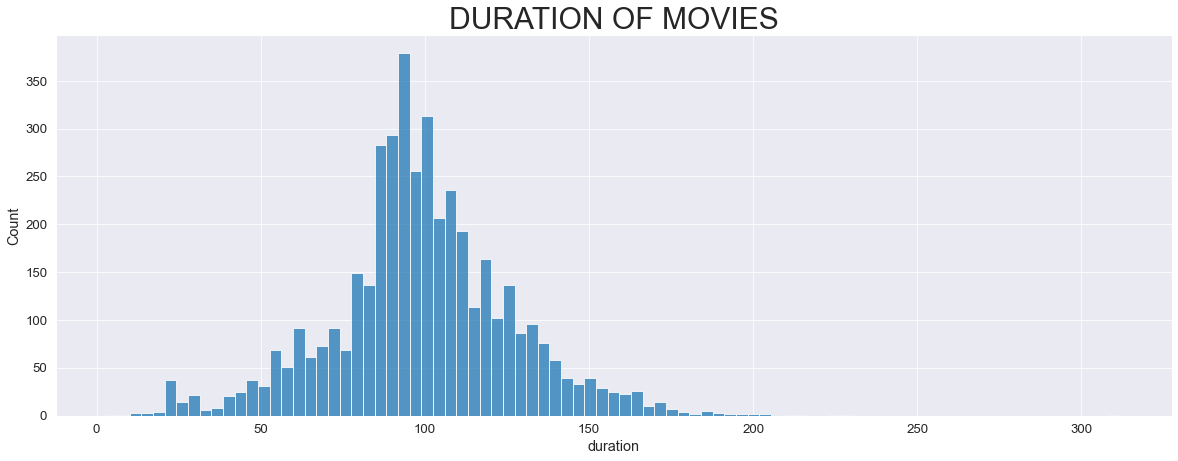

In [24]:
movies_df_copy = movies_df.copy()
dict_1=dict(movies_df.duration)
list_time=[]
for i in dict_1:
    j = dict_1[i].split()
    list_time.append(int(j[0])) 
movies_df_copy=movies_df_copy.assign(duration = list_time)
sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(20,7))
plt.title("DURATION OF MOVIES",fontsize=30)
sns.histplot(movies_df_copy.duration);


most movies have duration of 1 and half hours

**Monthly release** 

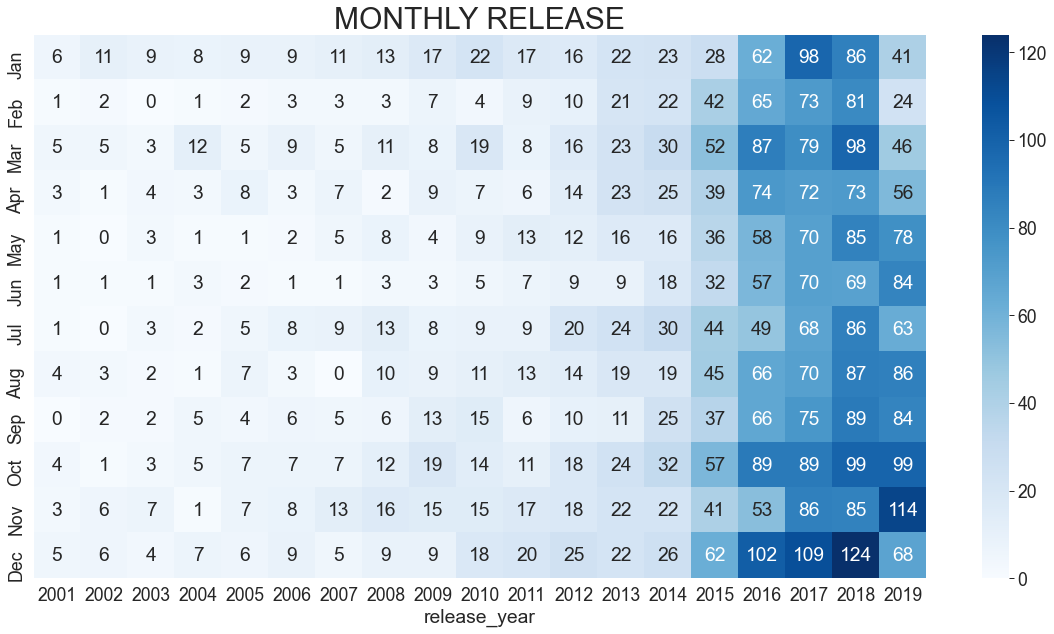

In [25]:
import calendar
import numpy as np
netflix_df_copy=netflix_df.copy()
netflix_df_copy
netflix_df_copy["date_added"] = pd.to_datetime(netflix_df_copy.date_added)
netflix_df_copy["Month"]=pd.DatetimeIndex(netflix_df_copy.date_added).month
# considering content release between 200 and 2020
netflix_df_copy = netflix_df_copy[netflix_df_copy.release_year>2000 ]
netflix_df_copy = netflix_df_copy[netflix_df_copy.release_year<2020 ]
heatmap_df = netflix_df_copy.groupby(["Month","release_year"]).count().reset_index()

heatmap_data = pd.pivot_table(heatmap_df,values="title" ,
                     index='Month', 
                     columns='release_year')

heatmap_data.replace(np.NaN,0,inplace=True)
sns.set_context("paper", font_scale=2)  
heatmap_data.index = [calendar.month_abbr[int(x)] for x in list(heatmap_data.index)]
heatmap_data = heatmap_data.astype(int)
plt.figure(figsize=(20,10))
plt.title("MONTHLY RELEASE",fontsize=30)
sns.heatmap(heatmap_data,fmt ="d",annot=True, cmap='Blues');


most content release is occured in 2018 december and most release are occuring at december .

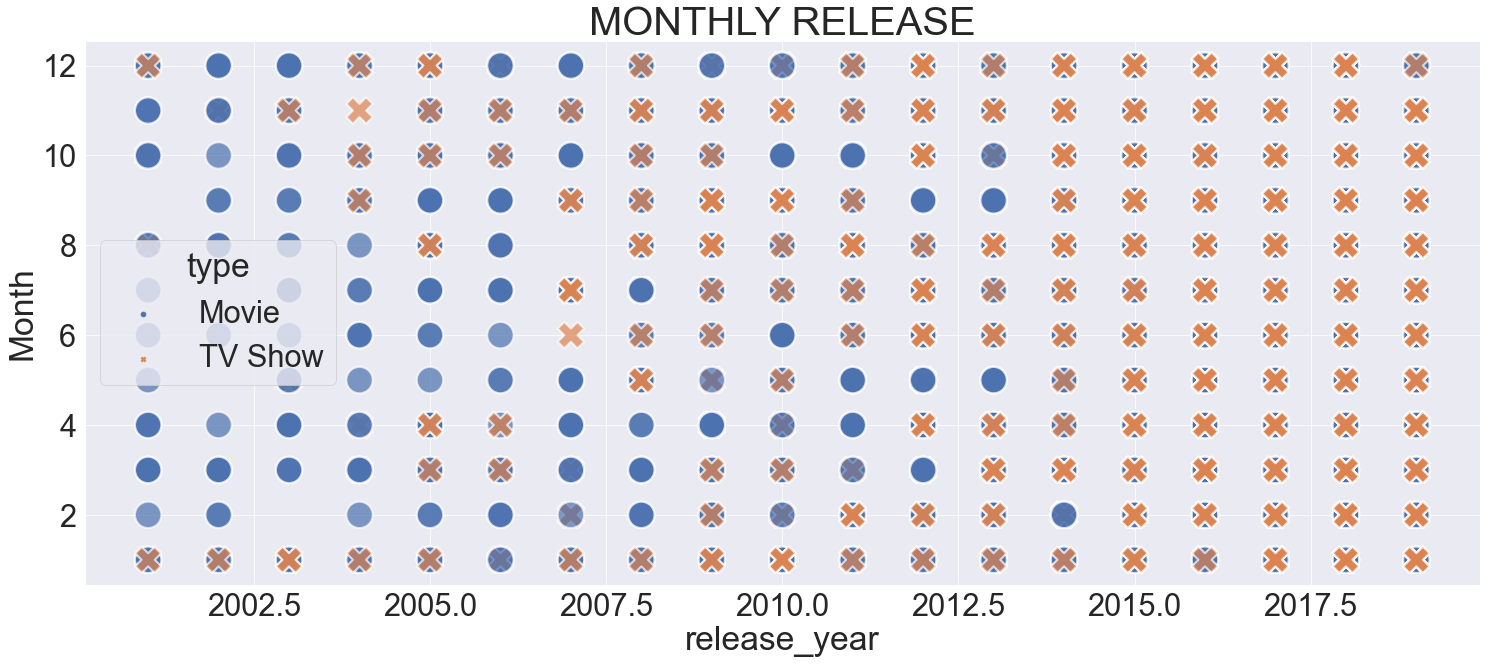

In [26]:

netflix_df_copy1=netflix_df_copy.copy()
netflix_df_copy1 = netflix_df_copy1[netflix_df_copy1.release_year>2000 ]
netflix_df_copy1 = netflix_df_copy1[netflix_df_copy1.release_year<2020 ]
plt.figure(figsize=(25,10))
sns.set_context("paper", font_scale=3.5)  
plt.title("MONTHLY RELEASE",fontsize=40)
sns.scatterplot(x='release_year', y='Month',
                palette="deep",
                data=netflix_df_copy1,hue='type',
                style = 'type', alpha=0.7,
                s=700);

in this plot perfect blue dots indicates that in that perticular time only Movie is released and perfect orangecross indicate that only TV shows. Mixed points indicating that at that perticular time both are released intensity of each indicate which one is higher in number.
in the early 2000 we can see that movies are released in every month .
but later (near to 2020) TV shows are also realeasing in every month.

Let us save and upload our work to Jovian before continuing

In [27]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

in this section we are going through some interesting questions about dataset



#### Q1: In india top 20  directors  who has most content


In [29]:
countries_df = netflix_df["country"]

country_india_index =[]
count = 0
for i in list(countries_df):
    k = [j.strip() for j in str(i).split(",")]
    if "India" in k:
        country_india_index.append(countries_df.index[count])
    count +=1
country_india_df = netflix_df.loc[country_india_index]


list_directors = list(country_india_df.director)
country_india_df1 = country_india_df.groupby("director")["title"].count().reset_index()
directors_dict={}
all_directors=[]

for i in list_directors:
    for j in str(i).split(","):
        all_directors.append(j.strip())
for i in all_directors:
    if i in directors_dict:
        directors_dict[i] +=1
    else :
        directors_dict[i] = 1
# removing nan
directors_dict.pop('nan')
directors_india_df = pd.DataFrame(list(directors_dict.items()),columns = ['director','number of titles'])
top_20_directors_india_df=directors_india_df.sort_values(by = "number of titles",ascending = False).head(20)
top_20_directors_india_df

,director,number of titles
194,David Dhawan,8
26,Umesh Mehra,8
36,S.S. Rajamouli,7
162,Dibakar Banerjee,7
73,Anurag Kashyap,6
38,Priyadarshan,6
65,Ram Gopal Varma,6
222,Zoya Akhtar,6
22,Rajiv Mehra,5
17,Qaushiq Mukherjee,5


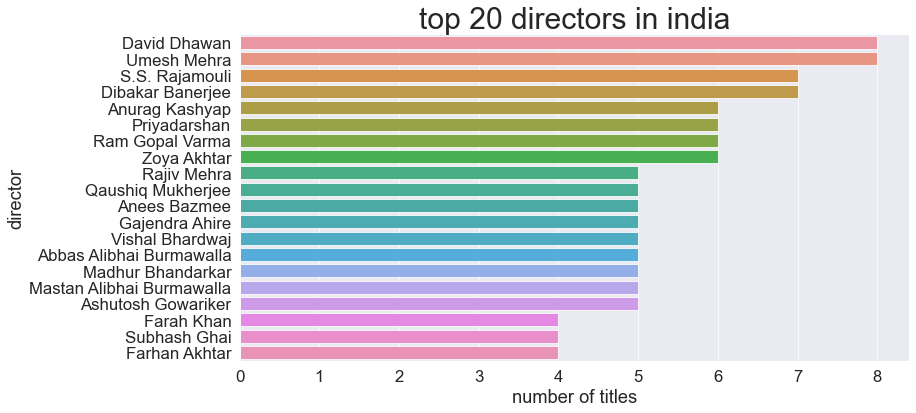

In [30]:
plt.figure(figsize=(12,6))
sns.set_context("paper", font_scale=1.9)  
plt.title("top 20 directors in india",fontsize=30)
sns.barplot(x=top_20_directors_india_df["number of titles"],y=top_20_directors_india_df["director"]);

#### Q2: Top 15 countries which have most content on netflix

In [31]:
#creating top 15 countries dataframe which has highest release
countries_df = netflix_df["country"]

countries_dict={}
all_countries=[]

for i in list(countries_df):
    for j in str(i).split(","):
        all_countries.append(j.strip())
for i in all_countries:
    if i in countries_dict:
        countries_dict[i] +=1
    else :
        countries_dict[i] = 1
# removing nan
countries_dict.pop('nan')
single_country_df = pd.DataFrame(list(countries_dict.items()),columns = ['country','number of content'])
top_15_countries = single_country_df.sort_values(by="number of content",ascending = False).head(15)
top_15_countries

,country,number of content
0,United States,2610
1,India,838
4,United Kingdom,602
7,Canada,318
13,France,271
29,Japan,231
5,Spain,178
2,South Korea,162
30,Germany,151
25,Mexico,129


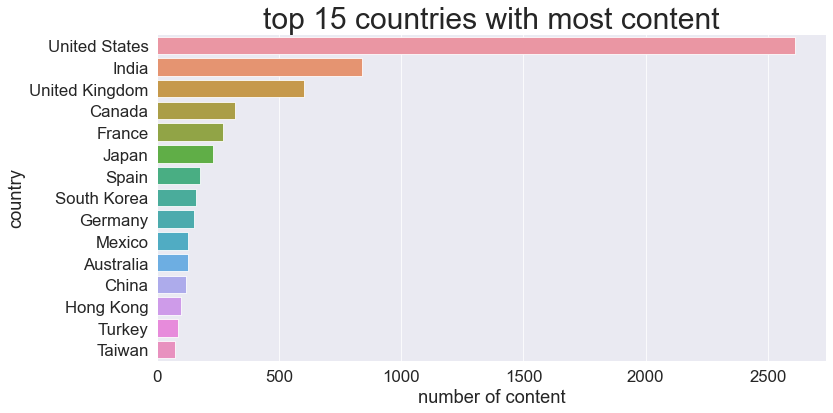

In [32]:
plt.figure(figsize=(12,6))
plt.title("top 15 countries with most content",fontsize=30)
sns.barplot(x=top_15_countries["number of content"],y=top_15_countries["country"]);

#### Q3: list the horror movies on netflix with rating TV-MA

In [33]:
movies_df1= netflix_df[netflix_df.type=="Movie"]

list_of_catogory = movies_df1.listed_in

horror_movie_index =[]
count = 0
for i in list(list_of_catogory):
    k = [j.strip() for j in str(i).split(",")]
    if "Horror Movies" in k:
        horror_movie_index.append(list_of_catogory.index[count])
    count +=1
horror_movies_df = movies_df1.loc[horror_movie_index]
horror_movies_rating_tvma = horror_movies_df[horror_movies_df.rating=="TV-MA"]
horror_movies_rating_tvma

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
29,70241607,Movie,Laddaland,Sopon Sukdapisit,"Saharat Sangkapreecha, Pok Piyatida Woramusik,...",Thailand,"September 7, 2018",2011,TV-MA,112 min,"Horror Movies, International Movies",When a family moves into an upscale housing de...
49,70142798,Movie,Phobia 2,"Banjong Pisanthanakun, Paween Purikitpanya, So...","Jirayu La-ongmanee, Charlie Trairat, Worrawech...",Thailand,"September 5, 2018",2009,TV-MA,125 min,"Horror Movies, International Movies",From disfiguring punishments to festering soul...
50,70062814,Movie,Shutter,"Banjong Pisanthanakun, Parkpoom Wongpoom","Ananda Everingham, Natthaweeranuch Thongmee, A...",Thailand,"September 5, 2018",2004,TV-MA,96 min,"Horror Movies, International Movies",After killing a young girl in a hit-and-run ac...
56,81173255,Movie,The Heretics,Chad Archibald,"Nina Kiri, Ry Barrett, Jorja Cadence, Will Kin...",Canada,"September 4, 2019",2017,TV-MA,88 min,Horror Movies,A withdrawn young woman hunted by a malicious ...
78,80128722,Movie,Gerald's Game,Mike Flanagan,"Carla Gugino, Bruce Greenwood, Henry Thomas, C...",United States,"September 29, 2017",2017,TV-MA,103 min,"Horror Movies, Thrillers","When her husband's sex game goes wrong, Jessie..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5382,81043542,Movie,Dabbe 6: The Return,Hasan Karacadağ,"Sema Şimşek, Nilay Gök, Volkan Ünal, Fehmi Kar...",Turkey,"April 17, 2019",2015,TV-MA,153 min,"Horror Movies, International Movies",A cardiologist tries to pinpoint the cause of ...
5431,81024557,Movie,Thriller,Dallas Jackson,"Jessica Allain, Luke Tennie, Tequan Richmond, ...",United States,"April 14, 2019",2018,TV-MA,87 min,Horror Movies,"When a prank goes wrong, a shy kid from Compto..."
5449,81043540,Movie,Dabbe 5: Zehr-i Cin,Hasan Karacadağ,"Nil Günal, Ümit Bülent Dinçer, Sultan Köroğlu ...",Turkey,"April 12, 2019",2014,TV-MA,133 min,"Horror Movies, International Movies",When Dilek becomes haunted by evil spirits and...
5450,81043541,Movie,Dabbe: The Possession,Hasan Karacadağ,"Cansu Kurgun, Irmak Örnek, A. Murat Özgen, Sul...",Turkey,"April 12, 2019",2013,TV-MA,135 min,"Horror Movies, International Movies","Ahead of her wedding, Kübra is possessed by de..."


In [34]:
list(horror_movies_rating_tvma.title)

['Laddaland',
 'Phobia 2',
 'Shutter',
 'The Heretics',
 "Gerald's Game",
 'The 3rd Eye',
 'The Bar',
 'The Secret',
 'Still',
 'Head Count',
 'The Forgotten',
 'Pee Mak',
 'Terrifier',
 'The Promise',
 'Little Evil',
 'Malevolent',
 'In the Tall Grass',
 'Truth or Dare',
 '14 Cameras',
 'Rattlesnake',
 'Eli',
 'Macchli Jal Ki Rani Hai',
 'The Babysitter',
 'Apostle',
 'Errementari: The Blacksmith and the Devil',
 'The Influence',
 'A.M.I.',
 'Medium',
 'Sinister Circle',
 'Agyaat',
 'Ludo',
 'Sabrina',
 'May the Devil Take You',
 '6-5=2',
 'Desolation',
 'Family Blood',
 'Krishna Cottage',
 'P',
 'Ragini MMS',
 'Ragini MMS 2',
 'Lifechanger',
 'Rampant',
 'The Perfection',
 'Cargo',
 'Munafik 2',
 'FirstBorn',
 'Ég man þig',
 'Ravenous',
 'Train to Busan',
 'Ranbhool',
 'Nails',
 'Haunting on Fraternity Row',
 'Paranormal Investigation',
 'Hypersomnia',
 'Stree',
 'Would You Rather',
 'Inhuman Kiss',
 'Mohawk',
 'The Maus',
 'The Golem',
 'Hungerford',
 'Rakkhosh',
 'The 3rd Eye 2',
 

#### Q4: list of TV shows which has greather than 7 season

In [35]:
TV_show_df = netflix_df[netflix_df.type=="TV Show"]
TV_show_df_copy = TV_show_df.copy()

dict_1=dict(TV_show_df.duration)
list_season=[]
for i in dict_1:
    j = dict_1[i].split()
    list_season.append(int(j[0])) 
TV_show_df_copy = TV_show_df_copy.assign(duration = list_season)
TV_show_season_gt7_df = TV_show_df_copy[TV_show_df_copy.duration>7]
TV_show_season_gt7_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5593,70143860,TV Show,The Vampire Diaries,NaN,"Nina Dobrev, Paul Wesley, Ian Somerhalder, Ste...",United States,"September 4, 2017",2017,TV-14,8,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy","Trapped in adolescent bodies, feuding vampire ..."
5605,70185015,TV Show,Portlandia,NaN,"Fred Armisen, Carrie Brownstein",United States,"September 25, 2019",2018,TV-14,8,TV Comedies,Fred Armisen and Carrie Brownstein send up the...
5607,70210884,TV Show,American Horror Story,NaN,"Evan Peters, Sarah Paulson, Jessica Lange, Den...",United States,"September 24, 2019",2018,TV-MA,8,"TV Horror, TV Mysteries, TV Thrillers",This twisted Emmy-winning drama plays upon the...
5629,70184207,TV Show,Shameless (U.S.),NaN,"William H. Macy, Emmy Rossum, Justin Chatwin, ...",United States,"September 10, 2019",2018,TV-MA,9,"TV Comedies, TV Dramas",This dramedy based on a British series centers...
5633,70205012,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,"September 1, 2019",2008,TV-PG,9,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane..."
5636,70177057,TV Show,The Walking Dead,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,"September 1, 2019",2018,TV-MA,9,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."
5640,70198116,TV Show,Forensic Files,NaN,Peter Thomas,United States,"September 1, 2016",2011,TV-14,9,"Crime TV Shows, Docuseries, Science & Nature TV",Detectives and crime lab technicians use the l...
5700,70155629,TV Show,Charmed,NaN,"Holly Marie Combs, Alyssa Milano, Brian Krause...",United States,"October 1, 2017",2005,TV-PG,8,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...
5737,80117560,TV Show,Trolls: The Beat Goes On!,NaN,"Amanda Leighton, Skylar Astin, Ron Funches, Da...",United States,"November 22, 2019",2019,TV-G,8,"Kids' TV, TV Comedies",As Queen Poppy welcomes a new time of peace in...
5754,70234440,TV Show,My Little Pony: Friendship Is Magic,NaN,"Ashleigh Ball, Tabitha St. Germain, Tara Stron...","United States, Canada","November 12, 2018",2018,TV-Y,8,Kids' TV,"Journey to the enchanted land of Equestria, wh..."


In [36]:
list(TV_show_season_gt7_df.title)

['The Vampire Diaries',
 'Portlandia',
 'American Horror Story',
 'Shameless (U.S.)',
 'Naruto',
 'The Walking Dead',
 'Forensic Files',
 'Charmed',
 'Trolls: The Beat Goes On!',
 'My Little Pony: Friendship Is Magic',
 "That '70s Show",
 'Supernatural',
 'Royal Pains',
 'Call the Midwife',
 'Club Friday The Series 6',
 "Dad's Army",
 'Trailer Park Boys',
 'Criminal Minds',
 "Grey's Anatomy",
 'Danger Mouse: Classic Collection',
 'NCIS',
 'Cheers',
 'The Andy Griffith Show',
 'COMEDIANS of the world',
 'Dexter',
 'The Office (U.S.)',
 'Club Friday The Series 8',
 'LEGO Ninjago: Masters of Spinjitzu',
 'Under Arrest',
 'Voltron: Legendary Defender',
 'Heartland',
 'Spirit: Riding Free',
 'Weeds',
 'Frasier',
 'Red vs. Blue',
 'Friends']

#### Q5: top 20 actors who included in more titles

In [37]:
actors_df = netflix_df["cast"]
actors_dict={}
all_actors=[]

for i in list(actors_df):
    for j in str(i).split(","):
        all_actors.append(j.strip())
for i in all_actors:
    if i in actors_dict:
        actors_dict[i] +=1
    else :
        actors_dict[i] = 1
actors_dict.pop('nan')
single_actor_df = pd.DataFrame(list(actors_dict.items()),columns = ['actor','number of titles'])
top_20_actors = single_actor_df.sort_values(by="number of titles",ascending = False).head(20)
top_20_actors

,actor,number of titles
5287,Anupam Kher,33
3212,Shah Rukh Khan,30
5027,Om Puri,27
2066,Naseeruddin Shah,27
922,Yuki Kaji,26
764,Akshay Kumar,26
2223,Takahiro Sakurai,25
3433,Paresh Rawal,25
8466,Amitabh Bachchan,24
240,Boman Irani,23


In [ ]:
plt.figure(figsize=(12,6))
plt.title("top 20 actors with most title")
sns.barplot(x=top_20_actors["number of titles"],y=top_20_actors["actor"]);

in top 20 there are so many indian actors......

Let us save and upload our work to Jovian before continuing.

In [39]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

We've drawn many interesting inferences from the dataset, here's a summary of the few of them:

* most of the netflix release are movies 
* contents added on netflix is increasing with year that means that more people are interested in netflix series (including me!!!)
* most of the movies and TV series are rated as TV-MA
* more netflix shows released in the month of december for last few years
* united states have more content on netflix .India is the second one.
* there are so many indian actors in the top 20 who have included in most of the netflix shows all over the wold.Even though india is second in the contents.


In [41]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

there are somany other things we can do with this dataset 

> * best acotrs in country based analysis 
> * best directors in country base
> * most rated anime series list 
> * TV shows having greaterthan 10 season

References:

> * Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
> * Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
> * Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
> * python data analysis : https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas

In [43]:
import jovian

In [ ]:
jovian.commit(project=project_name,outputs=["netflix_titles.csv"])

In [45]:
print("GOOD LUCK !!!")

GOOD LUCK !!!


In [ ]:
jovian.commit()